In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import LabelEncoder
from umap import UMAP

/Users/karpova.eo/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Данные о качестве (вкусе) яблок. В основном предоставлены Американскими агрокультурными компаниями.

Загрузка данных

In [8]:
data = pandas.read_csv('data/apple_quality.csv')
data = data.drop(['A_id'], axis=1)

Пропущенные значения

In [9]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Распределения признаков

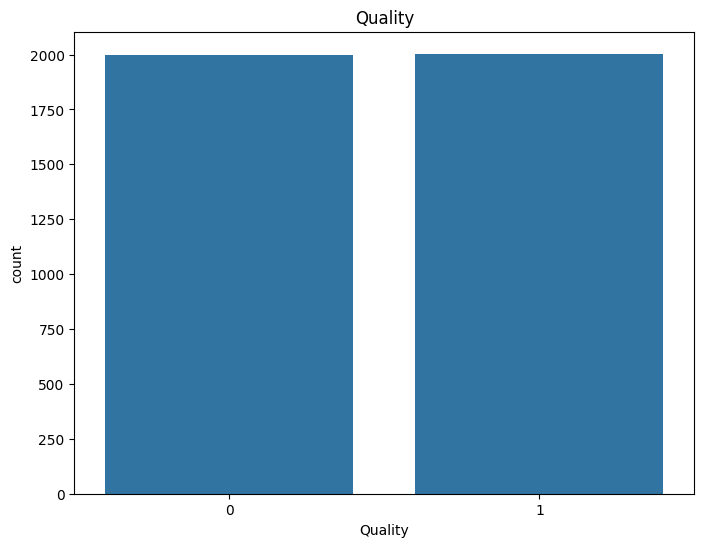

In [29]:
plt.figure(figsize=(8,6))
seaborn.countplot(data=data,x='Quality')
plt.title('Quality')
plt.show()

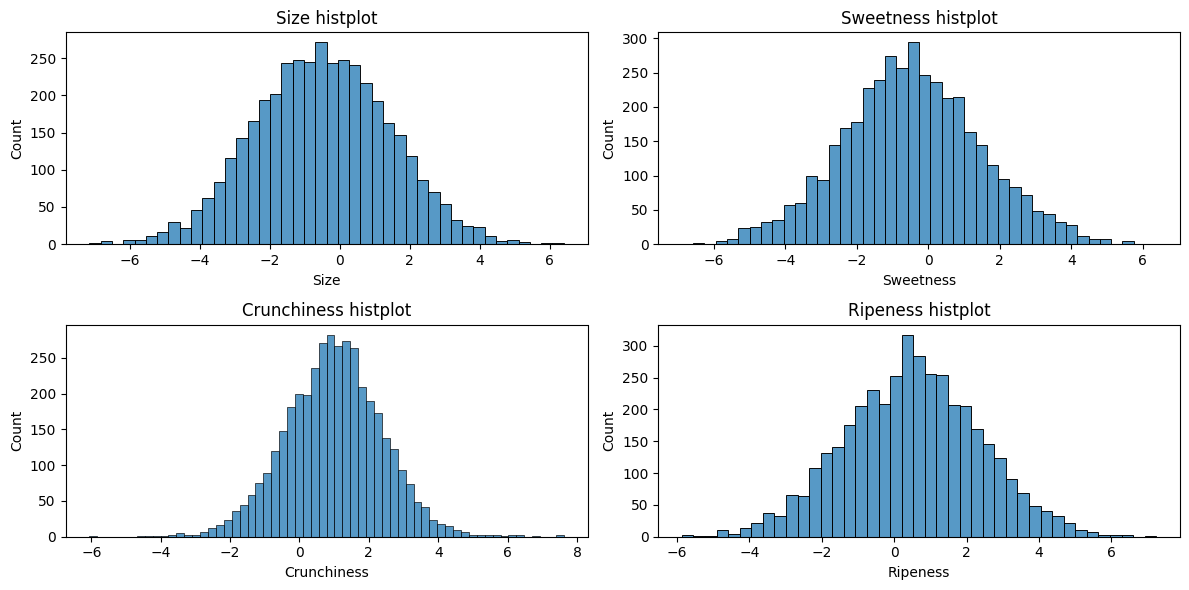

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
seaborn.histplot(x=data['Size'])
plt.title('Size histplot')

plt.subplot(2, 2, 2)
seaborn.histplot(x=data['Sweetness'])
plt.title('Sweetness histplot')

plt.subplot(2, 2, 3)
seaborn.histplot(x=data['Crunchiness'])
plt.title('Crunchiness histplot')

plt.subplot(2, 2, 4)
seaborn.histplot(x=data['Ripeness'])
plt.title('Ripeness histplot')

plt.tight_layout()
plt.show()

Преобразование категориальных признаков. 

In [10]:
data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)

Вывод матрицы корреляции

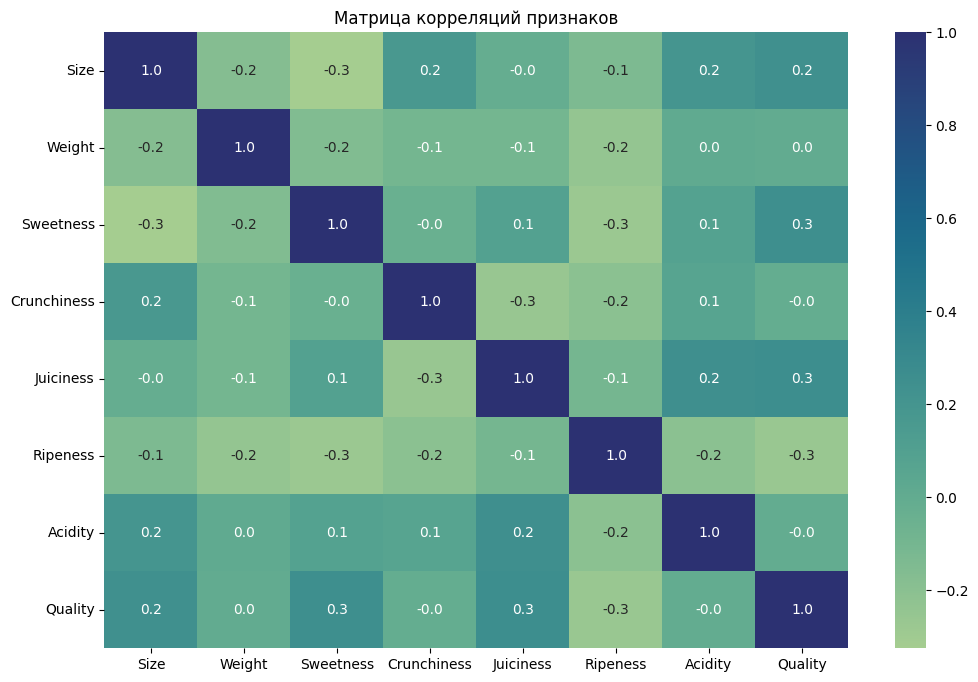

In [11]:
plt.figure(figsize=(12, 8))
seaborn.heatmap(data.corr(), annot=True, cmap='crest', fmt=".1f")
plt.title('Матрица корреляций признаков')
plt.show()

1) Чаще крупные яблоки менее сладкие
2) Чаще спелые яблоки менее сладкие
3) Чаще сочные яблоки менее хрустящие
4) Чаще спелые яблоки считают менее вкусными
5) Более вкусными считают сочные, сладкие, крупные яблоки
6) Чаще кислые яблоки более сочные

Парные отношения признаков

<Figure size 1920x1440 with 0 Axes>

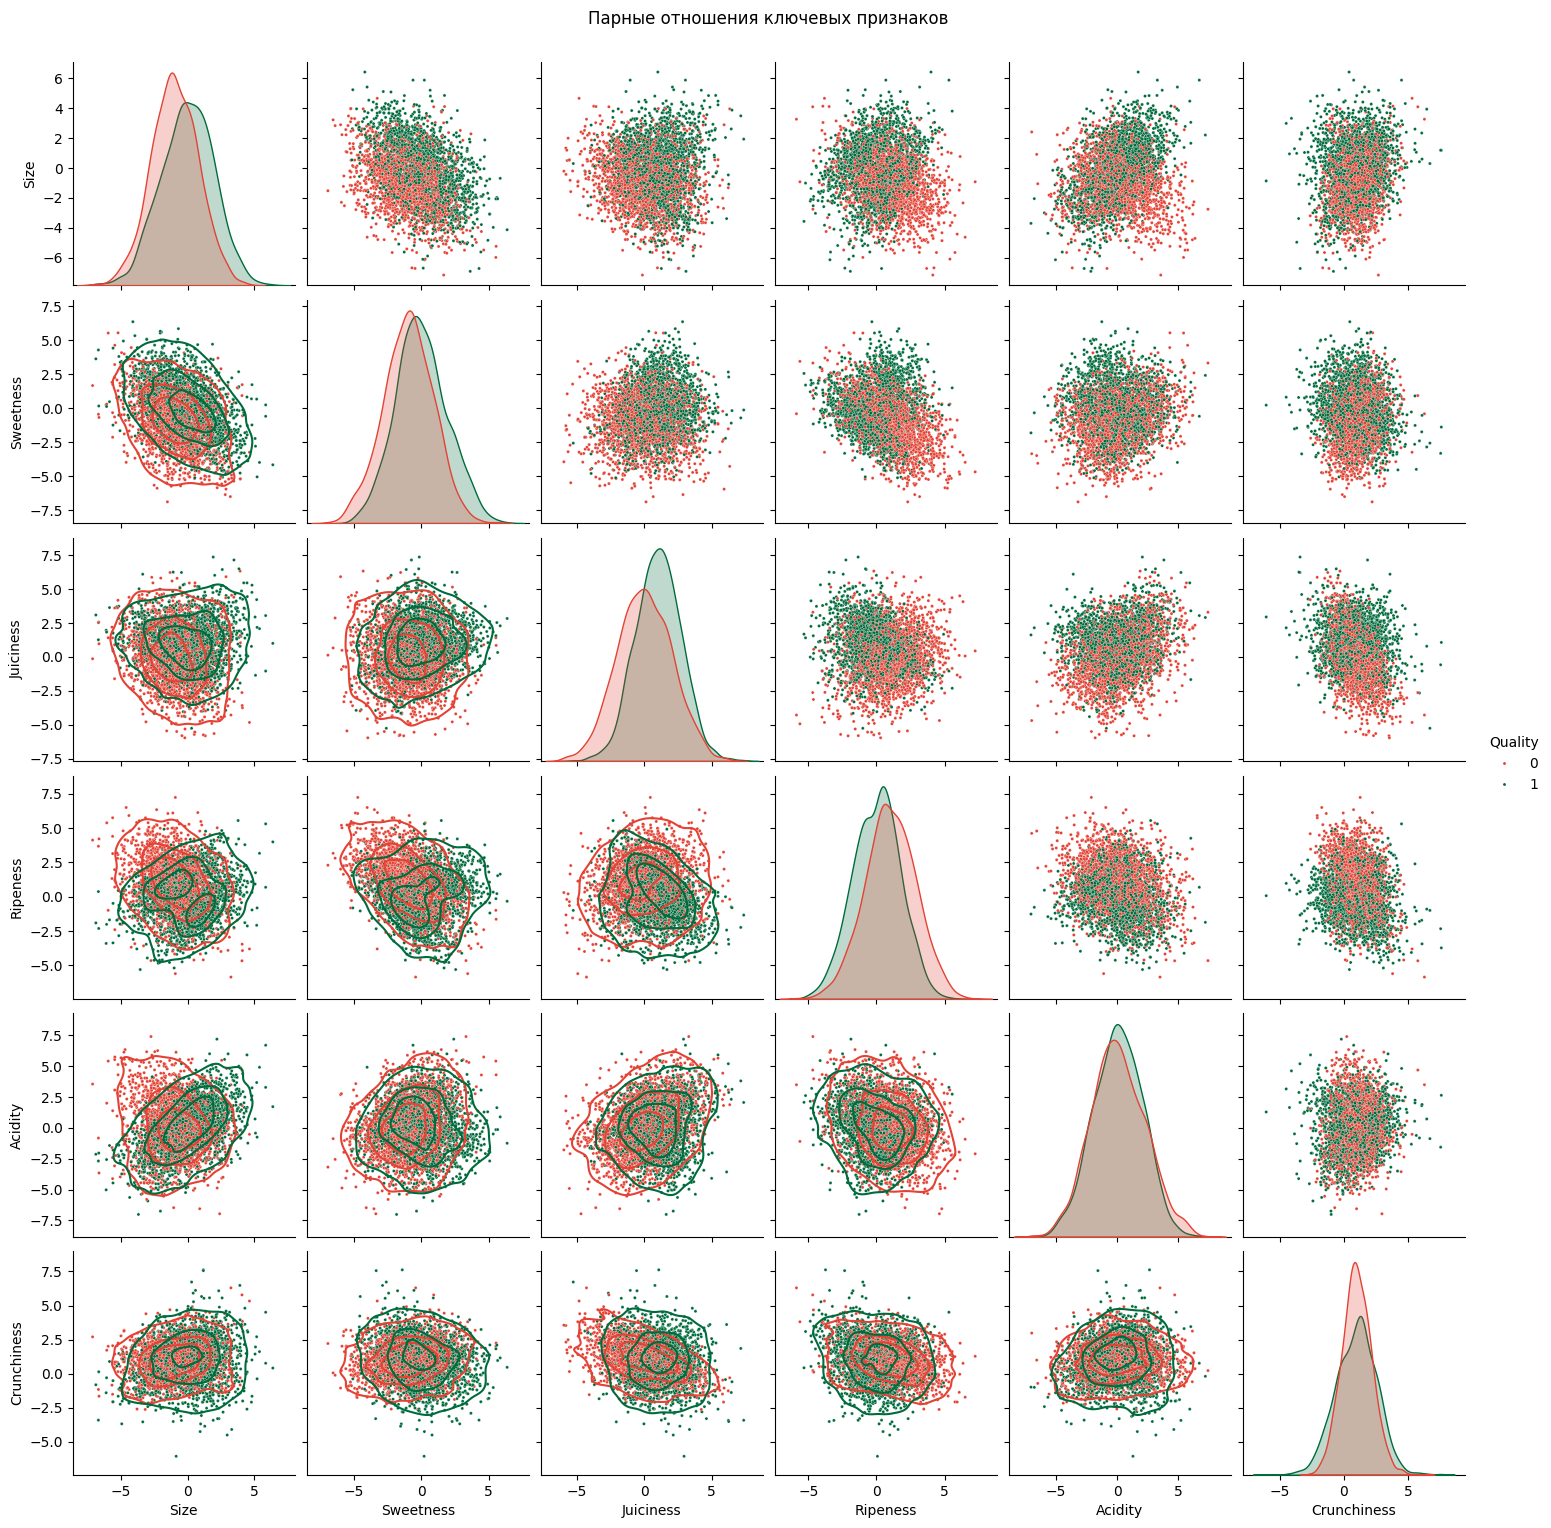

In [19]:
plt.figure(dpi=300)
key_features = ['Size', 'Sweetness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality', 'Crunchiness']
g = seaborn.pairplot(data[key_features], kind="scatter", hue='Quality', palette={0: '#E34234', 1: '#006B3C'}, plot_kws={'s': 5, 'alpha': 1})
g.map_lower(seaborn.kdeplot, levels=4, color=".2")
plt.suptitle('Парные отношения ключевых признаков', y=1.02)
plt.show()

По диагонали располагаются графики распределения "качественных"/"некачественных" яблок в зависимости от каждого признака.
В остальных ячейках - графики парных зависимостей признаков.

Диагональные:
1) К вкусным более однозначно относят более крупные яблоки
2) К вкусным более однозначно относят более сладкие яблоки
3) К вкусным более однозначно относят более сочные яблоки
4) К вкусным более однозначно относят менее спелые яблоки
5) К вкусным более однозначно относят средне кислые яблоки; очень кислые чаще считают невкусными
6) К вкусным более однозначно относят либо совсем не хрустящие, либо очень хрустящие яблоки

По хрусту:
- Размер + Хруст: к вкусным чаще относят более хрустящие яблоки среднего размера
- Сладость + Хруст: к вкусным более однозначно относят более сладкие средне-хрустящие яблоки
- Сочность + Хруст: к вкусным более однозначно относят более сочные и хрустящие яблоки, либо менеехрустящие средне-сочные яблоки
- Спелость + Хруст: к вкусным более однозначно относят менее спелые яблоки с любой хрустящестью
- Кислость + Хруст: к вкусным более однозначно относят средние по обоим параметрам яблоки

По размеру:
- Сладость + Размер: к вкусным более однозначно относят крупные сладкие яблоки
- Сочность + Размер: к вкусным более однозначно относят крупные сочные яблоки
- Спелость + Размер: вкусными не считают мелкие спелые яблоки; к вкусным чаще относят крупные менее спелые яблоки (2 более плотных участка)
- Кислость + Размер: вкусными не считают мелкие кислые яблоки; к вкусным чаще относят либо менее кислые мелкие яблоки, либо более кислые крупные

По сладости:
- Сочность + сладость: к вкусным более однозначно относят сочные сладкие яблоки
- Спелость + сладость: вкусными не считают спелые несладкие яблоки; к вкусным чаще относят менее спелые и менее сладкие яблоки
- Кислость + сладость: среди яблок с кислинкой практически однозначно нравятся более сладкие

По сочности:
- Спелость + сочность: к вкусным более однозначно относят менее спелые более сочные яблоки
- Кислость + сочность: к вкусным более однозначно относят более сочные средне-кислые яблоки

По кислости:
- Кислость + Спелость: к вкусным более однозначно относят менее спелые кислые яблоки

Масштабирование данных

In [20]:
x_scaled = StandardScaler().fit_transform(data.drop('Quality', axis=1))
y = data['Quality']

Графики методами

/Users/karpova.eo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


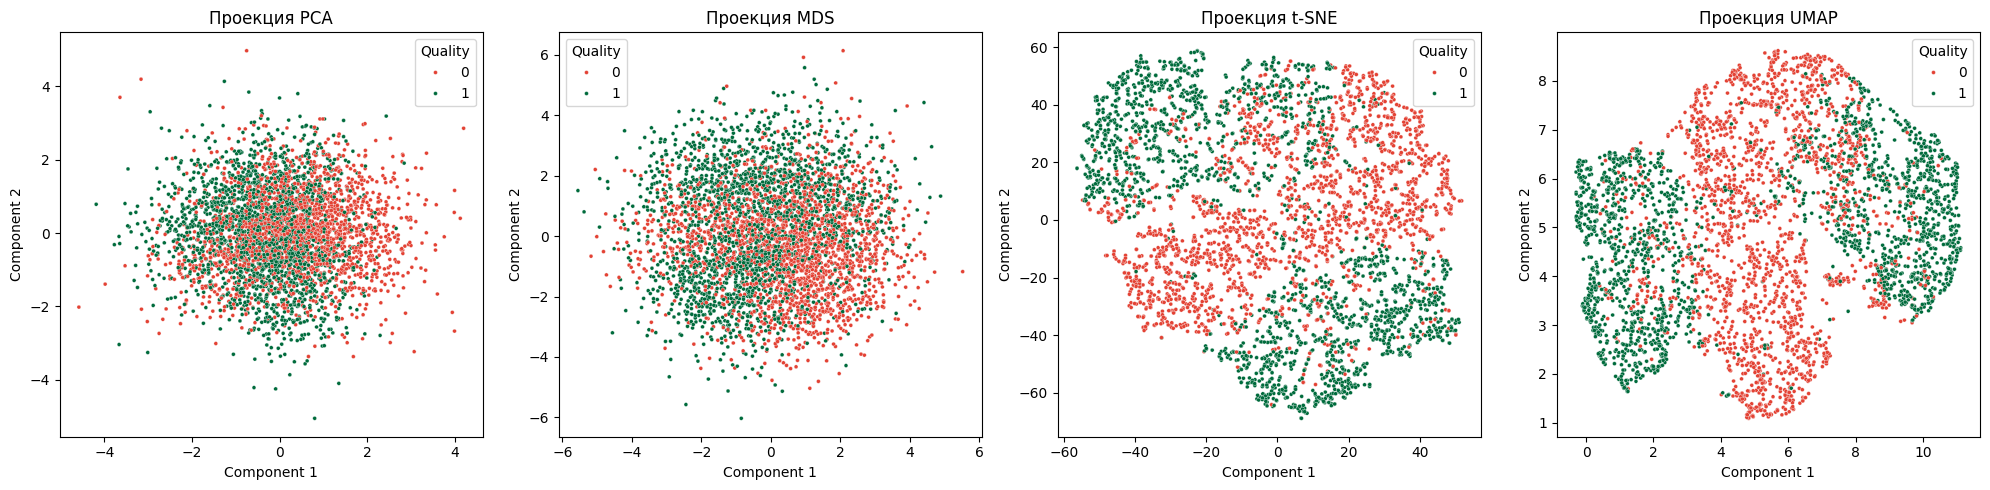

In [21]:
dimensions = 2

methods = {
    'PCA': PCA(n_components=dimensions),
    'MDS': MDS(n_components=dimensions),
    't-SNE': TSNE(n_components=dimensions),
    'UMAP': UMAP(n_components=dimensions)
}

fig = plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(methods.items(), 1):
    reduced_data = model.fit_transform(x_scaled)
    
    if dimensions == 3:
        sp = fig.add_subplot(1, 4, i, projection='3d')
        sp.scatter(xs=reduced_data[:,0], ys=reduced_data[:,1], zs=reduced_data[:,2], zdir='z', c=y)
        sp.set_title(f'Проекция {name}')
        sp.set_xlabel('Component 1')
        sp.set_ylabel('Component 2')
        sp.set_zlabel('Component 3')
    else:
        plt.subplot(1, 4, i)
        seaborn.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], 
                    hue=y, palette={0: '#E34234', 1: '#006B3C'}, s=8, alpha=1)
        plt.title(f'Проекция {name}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')

plt.tight_layout()
plt.show()

Используются алгоритмы уменьшения размерности:
- для более удобной визуализации
- для предобработки данных и обучения моделей
- позволяют сделать вывод о выделении групп комбинаций признаков.

Методы сохранения глобальной структуры:
- PCA - анализирует n-размерное облако наблюдений, выбирает проекцию, дающую максимальную дисперсию признаков при потере наименьшего количества данных, чтобы в меньшей степени исказить корреляцию между признаками (это может стать нерационально, при неверном выборе проекции данные "склеиваются"). Метод очень чувствителен к дисперсии переменных.
- MDS - преобразование многомерных наблюдений к n-мерным, старается в меньшей степени исказить расстояние между наблюдениями.

Методы сохранения локального расстояния между точками:
- t-SNE - конвертирует расстояние высокой размерности между точками в условные вероятности выбора одной точкой другой точки своим "соседом" (вероятность падает с увеличением расстояния по распределению Стьюдента).
- UMAP - алгоритм работает на графах, ищет ближайших соседей точки; больше остальных концентрируется на деталях, может упустить общую структуру данных; работает быстрее остальных.

Если сравнить полученные кластеры с графиками пар признаков, то можно сделать выводы, что:
- в одну группу вкусных попали средне-сладкие спелые сочные и крупные яблоки
- в другую группу вкусных попали сладкие неспелые некислые яблоки
- остальные чаще относились к невкусным